# Avacado Evaluation Project

# Problem Statement

# Avocado is a fruit consumed by people heavily in the United States.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation AveragePrice - the average price of a single avocado type - conventional or organic year - the year Region - the city or region of the observation Total Volume - Total number of avocados sold 4046 - Total number of avocados with PLU 4046 sold 4225 - Total number of avocados with PLU 4225 sold 4770 - Total number of avocados with PLU 4770 sold

The task is to make a mode that can consider the data provided and predict the Average Price.

Output Variable : Average Price

Problem Type : Regression Problem

# Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None) #to visualize all variables

# Importing Dataset

In [3]:
ds=pd.read_csv('C:/Users/Narayan/Downloads/avocado.csv')

In [4]:
ds.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
# This will give Index, Datatype and memory information.
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# Checking Null Values

In [7]:
ds.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
df=ds.dropna(subset=['Unnamed: 0','Date','AveragePrice','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region',])

In [9]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# Exploratory Data Analysis

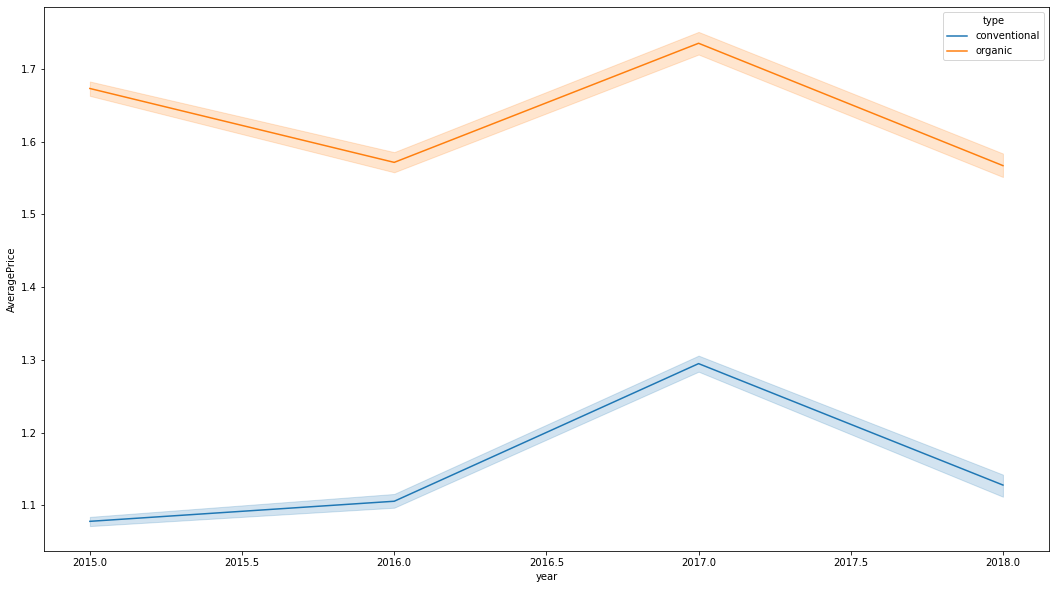

In [12]:
# lineplot Display distribution of data across all level of category
plt.figure(figsize=(18,10))
sns.lineplot(x='year', y='AveragePrice', hue='type', data=df)
plt.show()

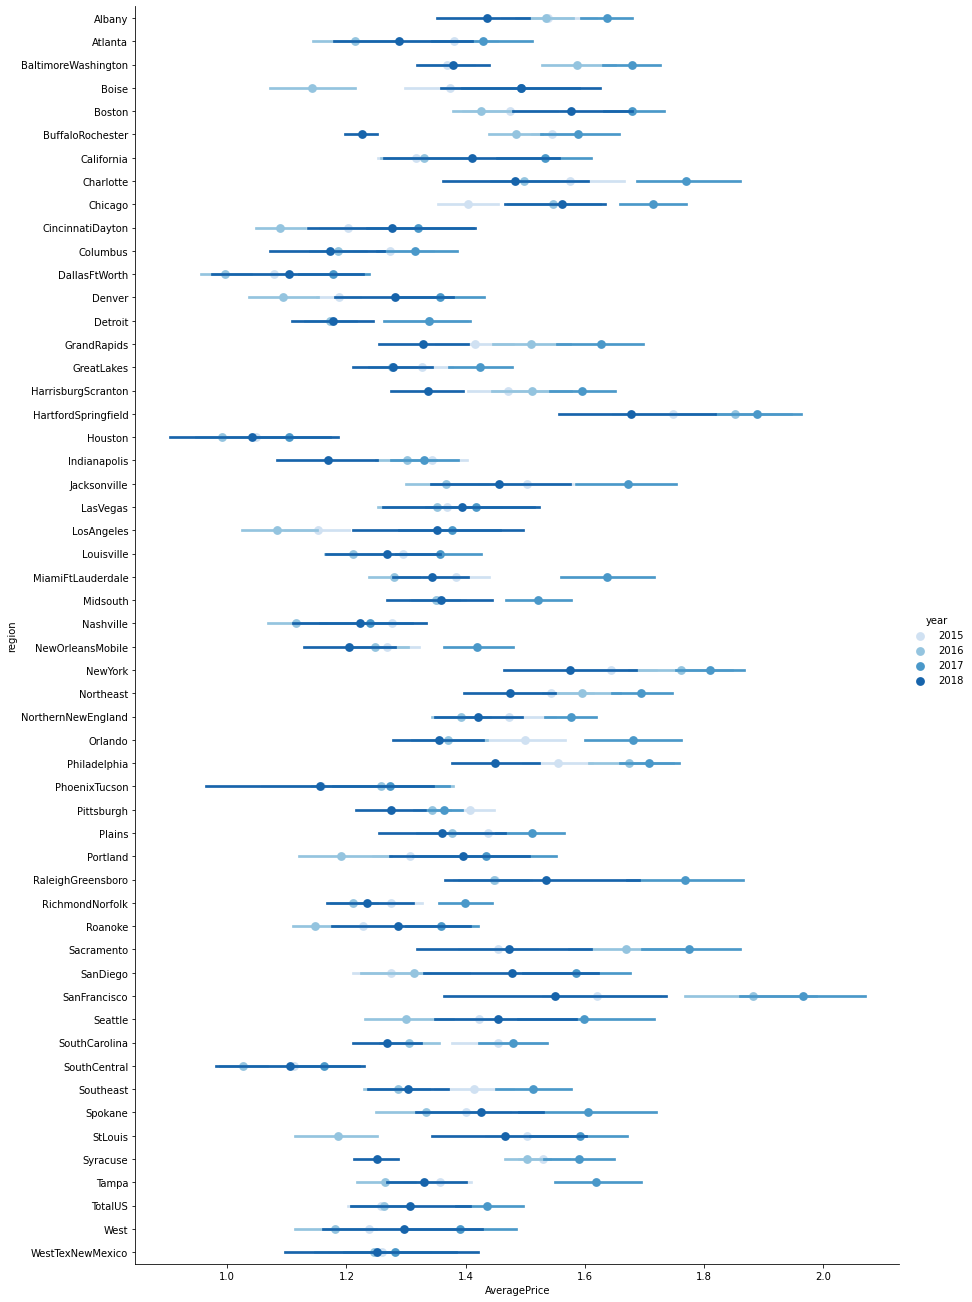

In [13]:
# Factorplot Display distribution of data across all level of category
sns.factorplot('AveragePrice','region',data=df,hue='year',size=18,aspect=0.7,palette='Blues',join=False)

Just by observing factorplot, the average price is high on Albany & Charlotte region on year 2016.



Text(0.5, 1.0, 'Average Price')

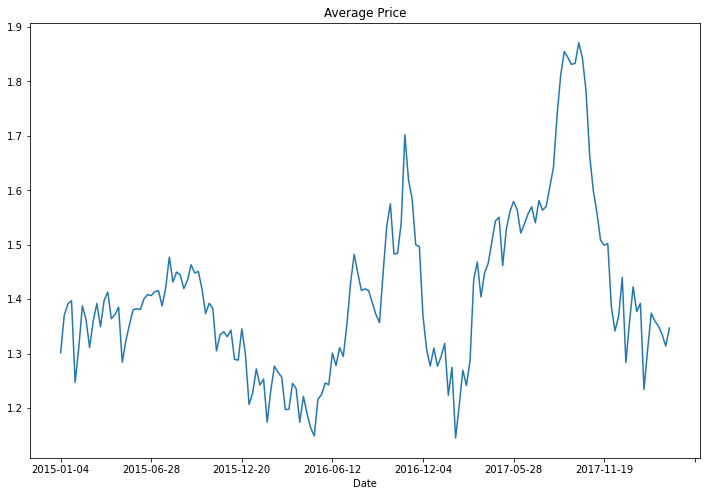

In [14]:
#Group Display distribution of data across all level of category
date=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
date['AveragePrice'].plot()
plt.title('Average Price')

The Average price is high on June month of 2015, then average price is increasing frequently on every five month onwards.



<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

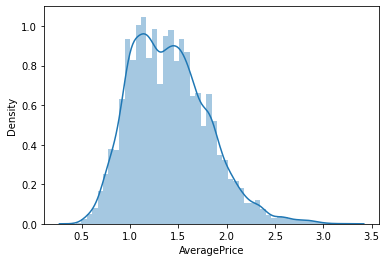

In [15]:
# Distplot Display distribution of data across all level of category
sns.distplot(df['AveragePrice'],kde=True)

# Preprocessing

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.6+ MB


In [17]:
df.drop(['Unnamed: 0','Date','type','region'],axis=1,inplace=True)

In [18]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year              int64
dtype: object

In [19]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')

In [20]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [21]:
#check the null values in dataset
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
dtype: int64

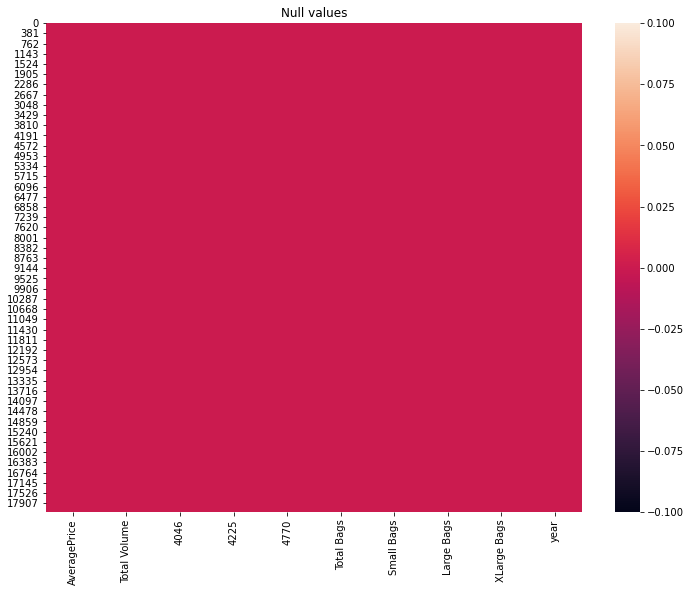

In [22]:
#Heatmap Display distribution of data across all level of category
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   year          18249 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.0 MB


In [24]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


<AxesSubplot:>

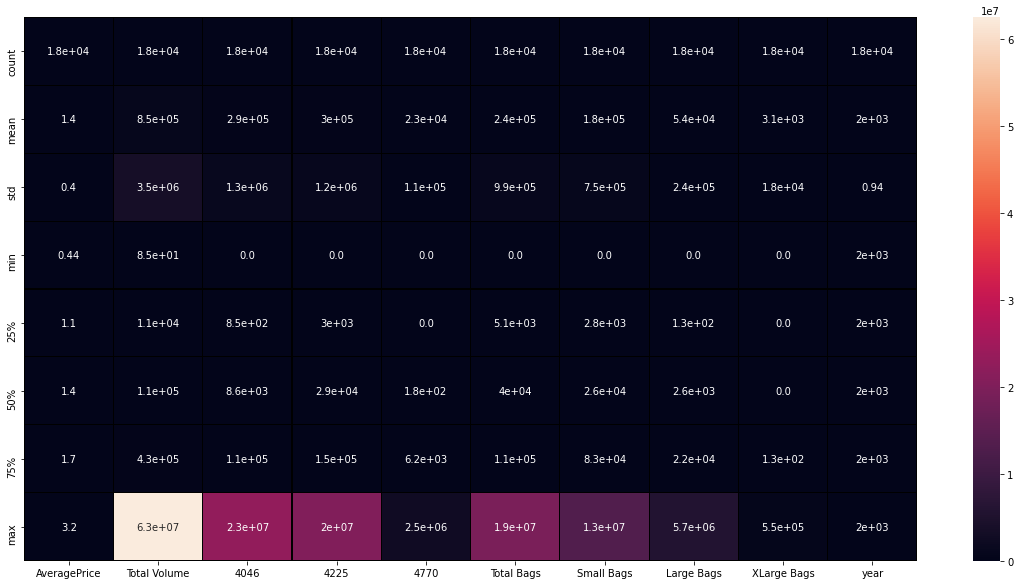

In [25]:
#Heatmap Display distribution of data across all level of category
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2')

# Correlation Matrix

In [26]:
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<AxesSubplot:>

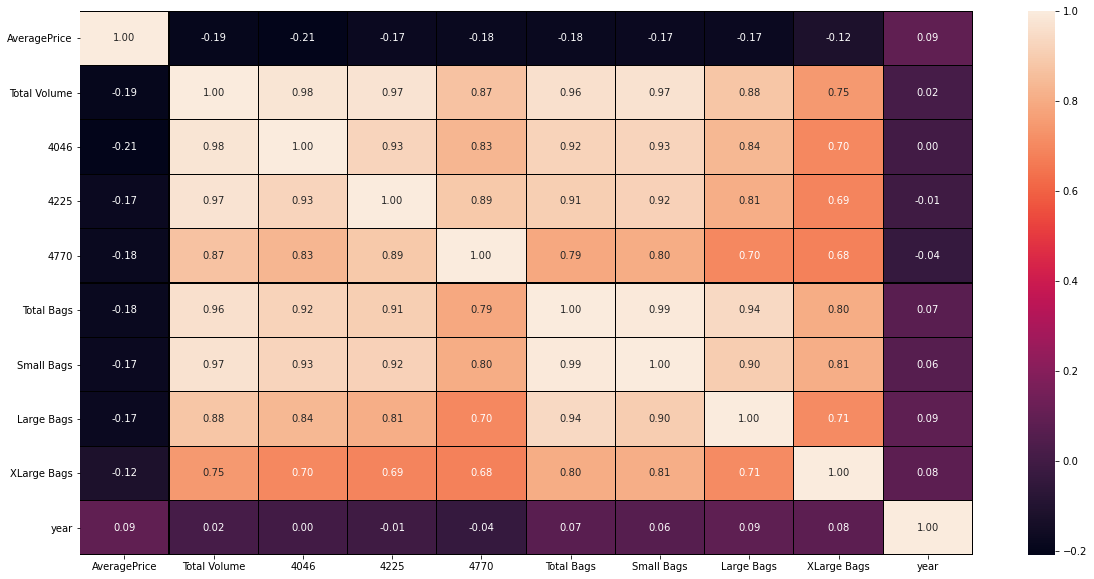

In [27]:
#Heatmap Display distribution of data across all level of category
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Removing Outliers from the Dataset

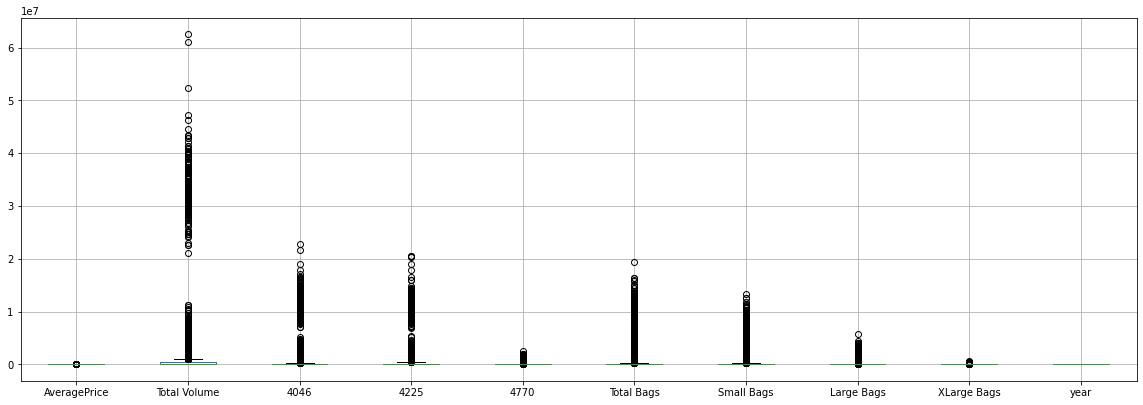

In [28]:
#Boxplot Display distribution of data across all level of category
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 0.22235202, 0.17557961,
        1.22128204],
       [0.13901962, 0.23042664, 0.23110251, ..., 0.22233464, 0.17557961,
        1.22128204],
       [1.18206895, 0.21208462, 0.23100731, ..., 0.22231148, 0.17557961,
        1.22128204],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 0.22256082, 0.17557961,
        1.97050371],
       [1.30138182, 0.24162464, 0.2304279 , ..., 0.2225293 , 0.17557961,
        1.97050371],
       [0.53151208, 0.24125273, 0.22934712, ..., 0.22262764, 0.17557961,
        1.97050371]])

In [30]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [31]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015


In [32]:
df.shape

(18249, 10)

In [33]:
df_new.shape

(17651, 10)

In [34]:
Data_loss=((18249-17651)/18249*100)
Data_loss

3.276891884486821

# To check distribution of Skewness

In [35]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [36]:
x= df.drop('AveragePrice',axis=1)
y= df['AveragePrice']

# Skewness Handling

In [37]:
x.skew()

Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [38]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

The power transform function is used to reduce the skewness

In [39]:
df_new.skew()

Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
year            0.213156
dtype: float64

In [40]:
x=df_new
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-1.221895
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-1.221895
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-1.221895
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-1.221895
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-1.221895


# Regression Model

In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Linear regression Model

In [42]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.4740516167480586
At random state 0,the testing accuracy is:0.4646817399838984


At random state 1,the training accuracy is:0.4560121010512297
At random state 1,the testing accuracy is:0.47161799256418435


At random state 2,the training accuracy is:0.4741067584311025
At random state 2,the testing accuracy is:0.46392530125809706


At random state 3,the training accuracy is:0.46274684677916844
At random state 3,the testing accuracy is:0.46963466624116845


At random state 4,the training accuracy is:0.4731409180864842
At random state 4,the testing accuracy is:0.4649608524037596


At random state 5,the training accuracy is:0.46166084752971004
At random state 5,the testing accuracy is:0.4696672739409249


At random state 6,the training accuracy is:0.46228584453946153
At random state 6,the testing accuracy is:0.4694105590678185


At random state 7,the training accuracy is:0.465556395941659
At random state 7,the testing accuracy is:0.46718914320099

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=1)
lr.fit(x_train,y_train)


LinearRegression()

In [44]:
# predict the value
pred=lr.predict(x_test)
print("predicted ",pred)
print("actual ",y_test)

predicted  [1.54011344 1.14383008 1.23148216 ... 1.17705987 1.12811935 1.11160759]
actual  14192    2.11
1873     0.98
7293     1.17
15087    1.78
9888     1.61
420      1.11
10808    1.99
3032     1.41
5156     1.19
15724    1.02
1409     0.94
6819     1.18
14108    1.12
205      1.08
18179    1.71
10569    1.57
17637    1.81
8973     1.24
10137    0.99
6938     1.34
11809    1.59
1292     1.24
6353     1.01
3874     1.19
213      1.07
942      0.72
3933     0.83
1160     0.92
2620     0.97
16008    1.45
10616    2.14
6892     1.35
12756    1.48
11443    1.95
6270     1.10
2870     1.16
7878     1.83
10937    1.63
17176    1.06
6646     1.36
6715     1.64
1866     0.98
14342    1.41
6544     1.68
9856     1.55
4648     1.17
8799     1.00
2946     1.07
2798     0.73
5424     0.95
7174     1.52
15156    1.70
5064     1.11
1475     1.14
15111    1.46
15301    1.44
2377     0.80
5493     0.82
12383    1.61
9736     1.36
2285     1.20
7067     1.39
2113     1.14
7440     1.29
10394    1.50

In [45]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.2285711256388504
Mean squared error: 0.08604395829425265
Root mean squared error: 0.2933325046670632


The Root mean squared error value is low so we can say this is an good model but we should compare with another model.

In [46]:
predict_test=lr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

47.16179925641843


In [47]:
predict_train=lr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

45.601210105122966


Cross validation score for Logistic regression model



In [48]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')


At cross fold(j) the cv score is -4.463163533116907 and accuracy score for training is 0.4560121010512297 and accuracy score  for testing is 0.47161799256418435


At cross fold(j) the cv score is -0.2609775394630224 and accuracy score for training is 0.4560121010512297 and accuracy score  for testing is 0.47161799256418435


At cross fold(j) the cv score is -0.16818569372346698 and accuracy score for training is 0.4560121010512297 and accuracy score  for testing is 0.47161799256418435


At cross fold(j) the cv score is -0.022149417131623283 and accuracy score for training is 0.4560121010512297 and accuracy score  for testing is 0.47161799256418435


At cross fold(j) the cv score is -0.09585151302270517 and accuracy score for training is 0.4560121010512297 and accuracy score  for testing is 0.47161799256418435


At cross fold(j) the cv score is -0.01611610793400033 and accuracy score for training is 0.4560121010512297 and accuracy score  for testing is 0.47161799256418435


At cross fol

The Cross validation score of Avacodo average price for training & testing accuracy score is 47% & 45% respectively.



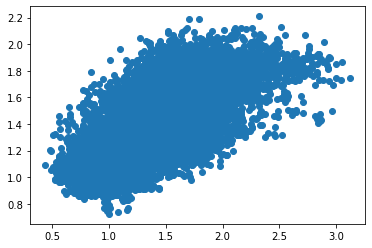

In [49]:
plt.scatter(x=y_test,y=predict_test)

# Decision Tree Regressor Model

In [50]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


In [51]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:1.0
At random state 0,the testing accuracy is:0.5162639525805958


At random state 1,the training accuracy is:1.0
At random state 1,the testing accuracy is:0.5283180283520212


At random state 2,the training accuracy is:1.0
At random state 2,the testing accuracy is:0.46990669659730344


At random state 3,the training accuracy is:1.0
At random state 3,the testing accuracy is:0.47766655814493797


At random state 4,the training accuracy is:1.0
At random state 4,the testing accuracy is:0.46191497868232834


At random state 5,the training accuracy is:1.0
At random state 5,the testing accuracy is:0.5085664771750227


At random state 6,the training accuracy is:1.0
At random state 6,the testing accuracy is:0.4896963359928753


At random state 7,the training accuracy is:1.0
At random state 7,the testing accuracy is:0.514802124020802


At random state 8,the training accuracy is:1.0
At random state 8,the testing accuracy is:0.4809759708885605


At rando

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=8)
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [53]:
# predict the value
pred=dtr.predict(x_test)
print("predicted ",pred)
print("actual ",y_test)

predicted  [1.6  1.85 1.81 ... 0.97 1.52 1.75]
actual  5758     1.67
11927    1.66
16428    2.08
5012     1.49
18007    1.77
3084     1.48
1747     0.58
6251     0.68
10585    1.65
10821    1.90
17988    1.51
15334    1.69
10983    1.82
12563    1.29
5490     0.94
15362    1.24
11542    1.72
5283     0.89
8975     1.23
17243    2.55
3368     1.04
15049    1.89
490      1.03
16846    0.89
5719     0.99
9543     1.58
4754     1.31
14208    1.55
15021    1.47
17549    1.19
10471    1.48
13484    1.80
10010    2.32
6709     1.47
4295     1.14
12530    0.99
11476    1.49
13056    1.38
10719    1.91
11357    1.06
7175     1.49
16207    1.95
5144     0.95
5587     0.95
16170    1.53
3314     0.89
8557     0.80
17600    1.28
13790    1.36
8517     1.22
11985    1.76
12553    1.35
1093     0.96
3240     1.60
16336    1.75
15114    1.86
4058     1.39
7377     1.28
14410    1.41
10951    1.69
6162     1.68
5114     1.08
9618     1.56
2215     1.37
18169    1.64
17719    1.71
17742    1.50
6970   

In [54]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.1939945205479452
Mean squared error: 0.08319142074363992
Root mean squared error: 0.2884292300437664


In Decision Tree Classifier model, The Root mean squared error value is low when compared with Linear Rgression model so we can say this is an good model but we should compare with one more model.

In [55]:
predict_test=dtr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

48.520243709015695


In [56]:
predict_train=dtr.predict(x_train)
print(r2_score(y_train,predict_train)*100)


100.0


Cross validation score for Decision Tree Regressor model



In [57]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')


At cross fold(j) the cv score is -3.3443556715455056 and accuracy score for training is 1.0 and accuracy score for testing is 0.485202437090157


At cross fold(j) the cv score is -0.9661813193937961 and accuracy score for training is 1.0 and accuracy score for testing is 0.485202437090157


At cross fold(j) the cv score is -1.6961581096667941 and accuracy score for training is 1.0 and accuracy score for testing is 0.485202437090157


At cross fold(j) the cv score is -0.676442634739663 and accuracy score for training is 1.0 and accuracy score for testing is 0.485202437090157


At cross fold(j) the cv score is -1.129372674704827 and accuracy score for training is 1.0 and accuracy score for testing is 0.485202437090157


At cross fold(j) the cv score is -0.7402758531889185 and accuracy score for training is 1.0 and accuracy score for testing is 0.485202437090157


At cross fold(j) the cv score is -0.728743220028342 and accuracy score for training is 1.0 and accuracy score for testing is 0

The Cross validation score of Avacodo average price for training & testing accuracy score is 100% & 48% respectively.



Lets plot with y_test vs prediction

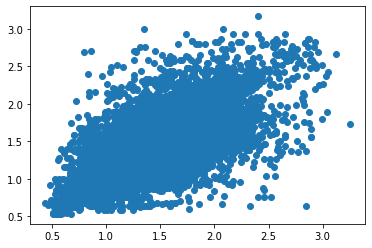

In [58]:
plt.scatter(x=y_test,y=predict_test)

# Random Forest Regressor Model


In [59]:
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


In [60]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    rdr.fit(x_train,y_train)
    pred_train=rdr.predict(x_train)
    pred_test=rdr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.9666281233546643
At random state 0,the testing accuracy is:0.7426132074369178


At random state 1,the training accuracy is:0.9639330051090633
At random state 1,the testing accuracy is:0.7551885983364764


At random state 2,the training accuracy is:0.9654594817687235
At random state 2,the testing accuracy is:0.7483515255099018


At random state 3,the training accuracy is:0.964363972533817
At random state 3,the testing accuracy is:0.7538218237216645


At random state 4,the training accuracy is:0.9642149006402874
At random state 4,the testing accuracy is:0.7512633352061663


At random state 5,the training accuracy is:0.9644764618021461
At random state 5,the testing accuracy is:0.7499672962588455


At random state 6,the training accuracy is:0.9620296255384108
At random state 6,the testing accuracy is:0.750850492618915


At random state 7,the training accuracy is:0.964294571074465
At random state 7,the testing accuracy is:0.7539174030437894


At 

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=1)
rdr.fit(x_train,y_train)

RandomForestRegressor()

In [62]:
# predict the value
pred=rdr.predict(x_test)
print("predicted ",pred)
print("actual ",y_test)

predicted  [1.6488 1.0734 1.3364 ... 1.2497 1.0866 1.0873]
actual  14192    2.11
1873     0.98
7293     1.17
15087    1.78
9888     1.61
420      1.11
10808    1.99
3032     1.41
5156     1.19
15724    1.02
1409     0.94
6819     1.18
14108    1.12
205      1.08
18179    1.71
10569    1.57
17637    1.81
8973     1.24
10137    0.99
6938     1.34
11809    1.59
1292     1.24
6353     1.01
3874     1.19
213      1.07
942      0.72
3933     0.83
1160     0.92
2620     0.97
16008    1.45
10616    2.14
6892     1.35
12756    1.48
11443    1.95
6270     1.10
2870     1.16
7878     1.83
10937    1.63
17176    1.06
6646     1.36
6715     1.64
1866     0.98
14342    1.41
6544     1.68
9856     1.55
4648     1.17
8799     1.00
2946     1.07
2798     0.73
5424     0.95
7174     1.52
15156    1.70
5064     1.11
1475     1.14
15111    1.46
15301    1.44
2377     0.80
5493     0.82
12383    1.61
9736     1.36
2285     1.20
7067     1.39
2113     1.14
7440     1.29
10394    1.50
1536     1.20
18068    

In [63]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))


error:
Mean absolute error: 0.14231045009784737
Mean squared error: 0.04011536222152642
Root mean squared error: 0.20028819790872956


In Random Forest Classifier model, The Root mean squared error value is low when compared with other 2 models.The Random Forest Classifier is best model in this case.

In [64]:
predict_test=rdr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

75.36580599054005


In [65]:
predict_train=rdr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

96.34407483201116


Cross validation Score for Random Forest Regressor model

In [66]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')


At cross fold(j) the cv score is -2.2855299415653922 and accuracy score for training is 0.9634407483201116 and accuracy score for testing is 0.7536580599054005


At cross fold(j) the cv score is -0.24689209052461758 and accuracy score for training is 0.9634407483201116 and accuracy score for testing is 0.7536580599054005


At cross fold(j) the cv score is -0.6768967226132878 and accuracy score for training is 0.9634407483201116 and accuracy score for testing is 0.7536580599054005


At cross fold(j) the cv score is 0.05301226305680427 and accuracy score for training is 0.9634407483201116 and accuracy score for testing is 0.7536580599054005


At cross fold(j) the cv score is -0.20875137579951017 and accuracy score for training is 0.9634407483201116 and accuracy score for testing is 0.7536580599054005


At cross fold(j) the cv score is 0.05190965418027316 and accuracy score for training is 0.9634407483201116 and accuracy score for testing is 0.7536580599054005


At cross fold(j) the cv sc

The Cross validation score of Avacodo average price for training & testing accuracy score is 96% & 75% respectively.

Lets plot with y_test vs prediction

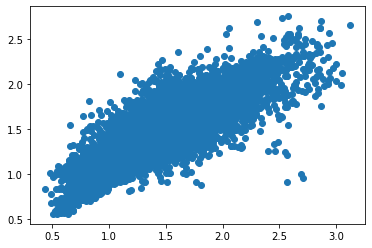

In [67]:
plt.scatter(x=y_test,y=predict_test)

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

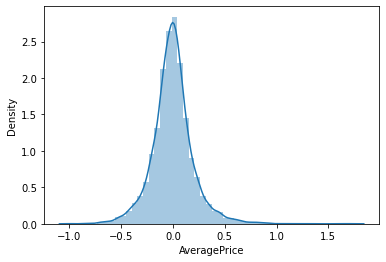

In [68]:
sns.distplot((y_test-pred),bins=50)

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

# Hyper Parameter Tuning


Hyper Parameter Tuning for Linear Regression

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [70]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_decision=ls.predict(x_test)
lss=r2_score(y_test,pred_decision)
print('R2 Score:',lss*100)
lsscore=cross_val_score(ls,x,y,cv=5)
lsc=lsscore.mean()
print('Cross Val Score:',lsc*100)

R2 Score: 47.151849723639714
Cross Val Score: -2.3662888264720694


Hyper Parameter Tuning for Decision Tree Regressor



In [71]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15)}
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [72]:
GCV.best_params_


{'max_depth': 8}

In [73]:
dtr=DecisionTreeRegressor(max_depth=4,random_state=8)

dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_decision=dtr.predict(x_test)
dtrs=r2_score(y_test,pred_decision)
print('R2 Score:',dtrs*100)
dtrscore=cross_val_score(dtr,x,y,cv=5)
dtrc=dtrscore.mean()
print('Cross Val Score:',dtrc*100)


R2 Score: 47.324098392454474
Cross Val Score: -20.479385286960454


Hyper Parameter Tuning for Random Forest Regressor



In [74]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [75]:
rdr=RandomForestRegressor(criterion='mse',max_features='sqrt')
rdr.fit(x_train,y_train)
rdr.score(x_train,y_train)
pred_decision=rdr.predict(x_test)
rdrs=r2_score(y_test,pred_decision)
print('R2 Score:',rdrs*100)
rdrscore=cross_val_score(rdr,x,y,cv=5)
rdrc=rdrscore.mean()
print('Cross Val Score:',rdrc*100)


R2 Score: 75.65395238419816
Cross Val Score: 13.179853338731313


Compare with Actual Final Vs Sample Prediction



,Y Test,Prediction
14192,2.11,1.6488
1873,0.98,1.0734
7293,1.17,1.3364
15087,1.78,1.5062
9888,1.61,1.9369


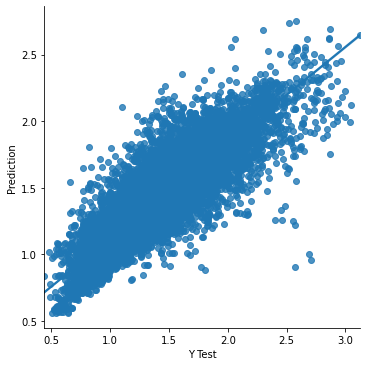

In [76]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':pred},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

# Saving the Model


In [77]:
import pickle
filename='Avacado Project.pkl'
pickle.dump(rdr, open(filename, 'wb'))

# Conclusion

In [78]:
loaded_model = pickle.load(open('Avacado Project.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)


75.65395238419816


In [79]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion


,0,1,2,3,4,5,6,7,8,9,...,12765,12766,12767,12768,12769,12770,12771,12772,12773,12774
Predicted,1.7284,1.084,1.3591,1.5231,1.8449,1.223,1.8616,1.3804,1.0546,1.1207,...,1.5663,1.6217,2.2408,1.2451,1.7042,1.6452,1.5449,1.2382,1.0926,1.0665
Original,1.7284,1.084,1.3591,1.5231,1.8449,1.223,1.8616,1.3804,1.0546,1.1207,...,1.5663,1.6217,2.2408,1.2451,1.7042,1.6452,1.5449,1.2382,1.0926,1.0665
